In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = []

for f in ['SMART_HLA','WT_HLA','controls']:
    subset = pd.read_csv(f'{f}.csv')
    subset['type'] = f.split('_')[0]
    
    if f == 'WT_HLA':
        subset['name'] = subset['name'].map(lambda x: 'WT_'+x)
    
    data.append(subset)
    
data = pd.concat(data,axis=0)
data

,name,tot1,tot2,tot3,sol1,sol2,sol3,type
0,SMART_A*01:01 _peptide,0.411,1.470,0.423,0.948,1.590,0.685,SMART
1,SMART_A*30:01 _peptide,2.420,2.720,3.310,2.610,2.470,3.370,SMART
2,SMART_A*29:02_peptide,8.390,8.270,14.200,8.640,9.210,8.940,SMART
3,SMART_A*02:01_peptide,7.330,6.720,10.600,8.200,6.390,8.430,SMART
4,SMART_A*03:01_peptide,1.180,1.060,1.580,1.110,0.889,1.100,SMART
...,...,...,...,...,...,...,...,...
5,original single chain trimer wt empty (H2Db_v3...,2.496,3.252,2.802,2.062,2.476,0.883,controls
6,hit6_CSM8,2.333,2.872,4.495,1.626,1.726,2.690,controls
7,CSM8 normal,21.664,25.825,21.023,19.500,16.217,18.732,controls
8,CSM8 normal 11,16.693,15.805,18.221,15.649,15.491,14.870,controls


In [5]:
data[data['type']=='controls']

,name,tot1,tot2,tot3,sol1,sol2,sol3,type
0,sfGFP,28.645,29.300,23.900,23.600,22.600,21.800,controls
1,hit6_CSM8_sFLAG_Nterm_12,26.900,21.700,24.600,25.600,27.600,24.900,controls
2,original_hit6_peptide,5.566,5.705,6.726,4.672,5.540,5.899,controls
3,original_hit6_empty,3.730,3.217,3.005,3.243,2.258,1.739,controls
4,original single chain trimer wt peptide (H2Db_...,0.422,0.426,0.424,0.156,0.251,0.416,controls
5,original single chain trimer wt empty (H2Db_v3...,2.496,3.252,2.802,2.062,2.476,0.883,controls
6,hit6_CSM8,2.333,2.872,4.495,1.626,1.726,2.690,controls
7,CSM8 normal,21.664,25.825,21.023,19.500,16.217,18.732,controls
8,CSM8 normal 11,16.693,15.805,18.221,15.649,15.491,14.870,controls
9,CSMA normal 15,22.204,21.994,20.200,19.056,21.167,18.104,controls


In [7]:
data['name'] = data['name'].map(lambda x: x.replace(' ',''))

data['MHC'] = data['name'].map(lambda x: x.split('_')[min(1,len(x.split('_'))-1)])
data.loc[data['type']=='controls','MHC'] = 'H2Db'

data['pep'] = data['name'].map(lambda x: x.split('_')[min(2,len(x.split('_'))-1)])
data.loc[data['type']=='controls','pep'] = 'empty'

data['tot_mean'] = np.mean(data.loc[:,'tot1':'tot3'],axis=1)
data['sol_mean'] = np.mean(data.loc[:,'sol1':'sol3'],axis=1)
data['tot_std'] = np.std(data.loc[:,'tot1':'tot3'],axis=1)
data['sol_std'] = np.std(data.loc[:,'sol1':'sol3'],axis=1)

data

,name,tot1,tot2,tot3,sol1,sol2,sol3,type,MHC,pep,tot_mean,sol_mean,tot_std,sol_std
0,SMART_A*01:01_peptide,0.411,1.470,0.423,0.948,1.590,0.685,SMART,A*01:01,peptide,0.768000,1.074333,0.496413,0.380111
1,SMART_A*30:01_peptide,2.420,2.720,3.310,2.610,2.470,3.370,SMART,A*30:01,peptide,2.816667,2.816667,0.369715,0.395418
2,SMART_A*29:02_peptide,8.390,8.270,14.200,8.640,9.210,8.940,SMART,A*29:02,peptide,10.286667,8.930000,2.767578,0.232809
3,SMART_A*02:01_peptide,7.330,6.720,10.600,8.200,6.390,8.430,SMART,A*02:01,peptide,8.216667,7.673333,1.703571,0.912299
4,SMART_A*03:01_peptide,1.180,1.060,1.580,1.110,0.889,1.100,SMART,A*03:01,peptide,1.273333,1.033000,0.222311,0.101905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,originalsinglechaintrimerwtempty(H2Db_v3_PH6),2.496,3.252,2.802,2.062,2.476,0.883,controls,H2Db,empty,2.850000,1.807000,0.310496,0.674873
6,hit6_CSM8,2.333,2.872,4.495,1.626,1.726,2.690,controls,H2Db,empty,3.233333,2.014000,0.918870,0.479744
7,CSM8normal,21.664,25.825,21.023,19.500,16.217,18.732,controls,H2Db,empty,22.837333,18.149667,2.128745,1.402107
8,CSM8normal11,16.693,15.805,18.221,15.649,15.491,14.870,controls,H2Db,empty,16.906333,15.336667,0.997797,0.336228


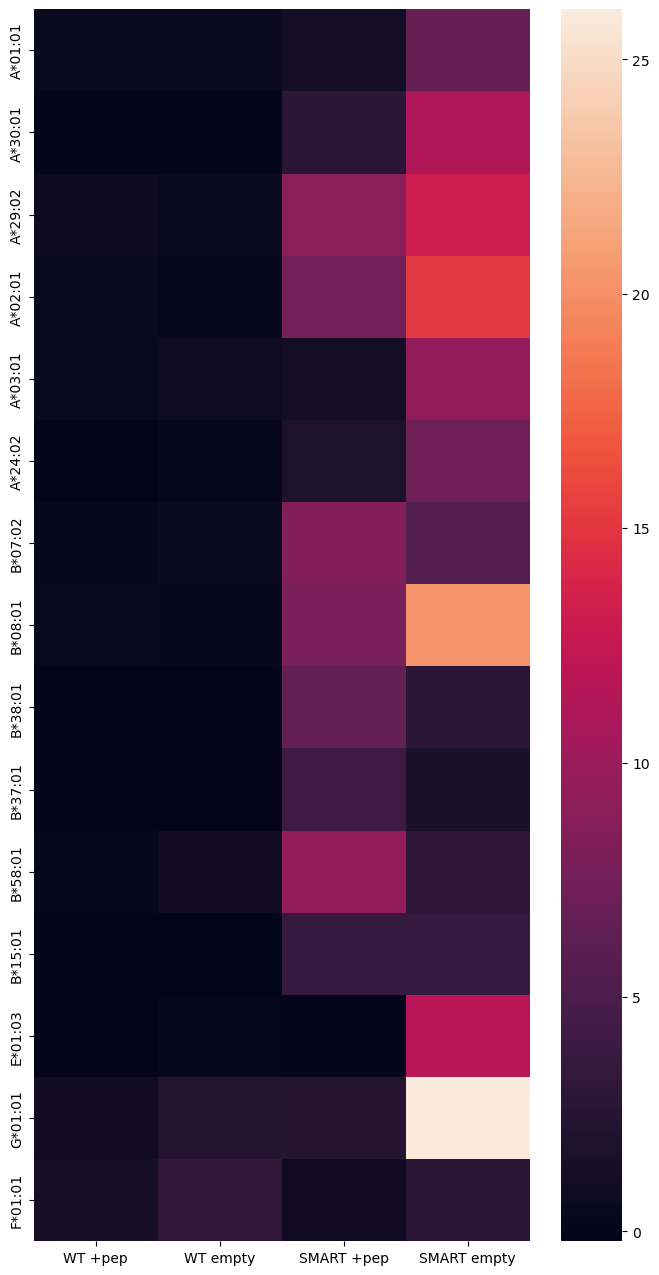

In [9]:
mhcs = data['MHC'].unique()
mhcs = mhcs[mhcs != 'H2Db']
hm_df = pd.DataFrame(index=['WT +pep','WT empty','SMART +pep','SMART empty'],columns=mhcs,dtype=float)

for mhc in mhcs:
    
    for t in ['WT','SMART']:
        
        for pep in ['peptide','empty']:
            
            row = data[data['name']==f'{t}_{mhc}_{pep}']
            
            if pep == 'peptide':
                pep_name = '+pep'
            else:
                pep_name = pep
            
            hm_df.loc[f'{t} {pep_name}',mhc] = row[f'sol_mean'].values[0]
            
plt.figure(figsize=[8,16])
sns.heatmap(hm_df.T)
plt.savefig('sol_heatmap.png',dpi=300,bbox_inches='tight')

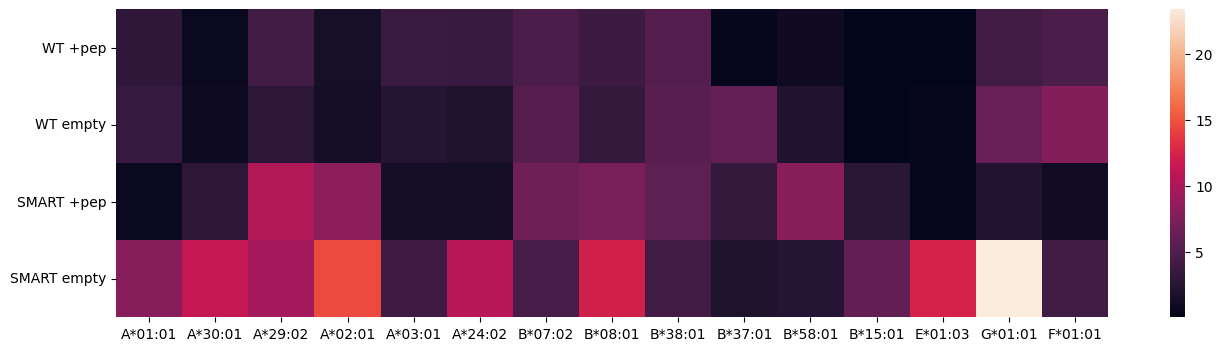

In [7]:
for mhc in mhcs:
    
    for t in ['WT','SMART']:
        
        for pep in ['peptide','empty']:
            
            row = data[data['name']==f'{t}_{mhc}_{pep}']
            
            if pep == 'peptide':
                pep_name = '+pep'
            else:
                pep_name = pep
            
            hm_df.loc[f'{t} {pep_name}',mhc] = row[f'tot_mean'].values[0]
            
plt.figure(figsize=[16,4])
sns.heatmap(hm_df)
plt.savefig('tot_heatmap.png',dpi=300,bbox_inches='tight')

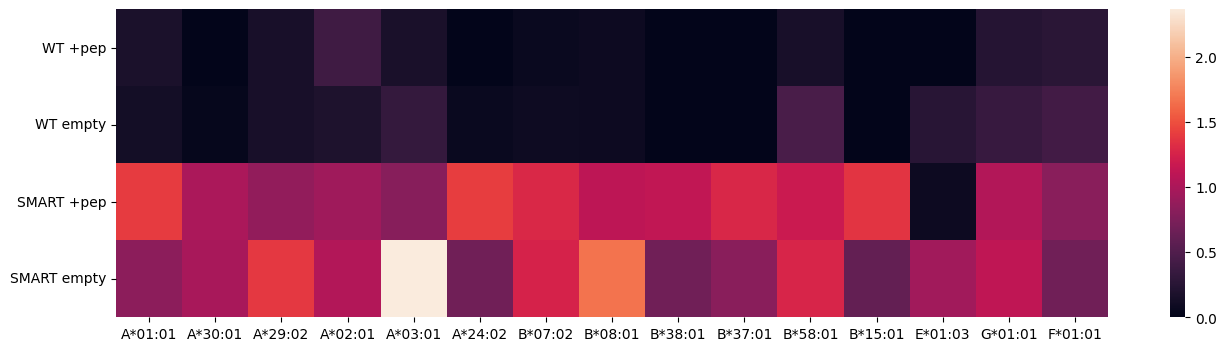

In [8]:
for mhc in mhcs:
    
    for t in ['WT','SMART']:
        
        for pep in ['peptide','empty']:
            
            row = data[data['name']==f'{t}_{mhc}_{pep}']
            
            if pep == 'peptide':
                pep_name = '+pep'
            else:
                pep_name = pep
            
            hm_df.loc[f'{t} {pep_name}',mhc] = max(0,row[f'sol_mean'].values[0])/row[f'tot_mean'].values[0]
            
plt.figure(figsize=[16,4])
sns.heatmap(hm_df)
plt.savefig('sol_frac_heatmap.png',dpi=300,bbox_inches='tight')